Abhinand Satish - Nuclear Instrumentation and measurement Project 1

In [1]:
%pip install beautifulsoup4 requests pandas numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import matplotlib.pyplot as plt
import os
import sys
import csv
import numpy as np
import pandas as pd
import requests

In [9]:
#Load print the text file /Users/abhinandsatish/Documents/2025/Spring/NIM/7314376.txt
# Load and print the text file /Users/abhinandsatish/Documents/2025/Spring/NIM/7314376.txt
path, dirs, files = next(os.walk("./"))   # 'This Folder'
file_count = len(files)

# Reading input
data = []
with open("7314376.txt") as f:
    lines = f.readlines()
    for line in lines[2:]:
        data.append(line.split())
    f.close()

# Create a DataFrame
df = pd.DataFrame(data, columns=['Photon_Energy_Kev', 'Emission_intensity_[%]'])
df['Photon_Energy_Kev'] = df['Photon_Energy_Kev'].astype(float)
df['Emission_intensity_[%]'] = df['Emission_intensity_[%]'].astype(float)

# Save to CSV
df.to_csv('7314376.csv', index=False)
print(df.head())


   Photon_Energy_Kev  Emission_intensity_[%]
0             304.00                  0.0259
1             304.43                  0.0340
2             333.37                  0.0640
3             334.80                  0.0320
4             334.90                  0.0550


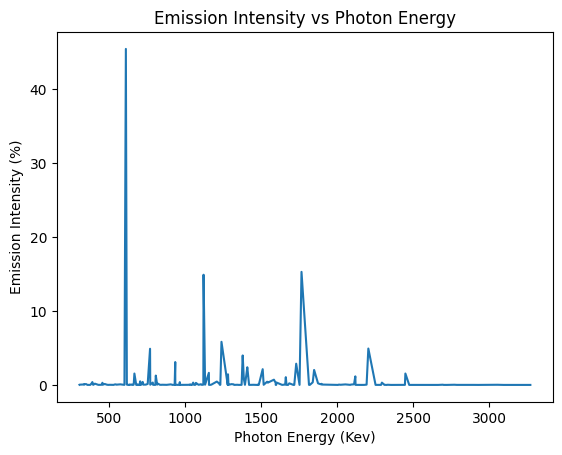

In [10]:
# Plotting
plt.plot(df['Photon_Energy_Kev'], df['Emission_intensity_[%]'])
plt.xlabel('Photon Energy (Kev)')
plt.ylabel('Emission Intensity (%)')
plt.title('Emission Intensity vs Photon Energy')
plt.show()



ASSUMPTIONS:
1. The radioisotope is a point source.
2. The intrinsic detection efficiency is 1.
3. The detector is fast enough such that no counts are lost due to deadtime.
4. The detector is a 3” diameter cylindrical detector that is facing the point source.
5. We will assume that we have good geometry due to a series of collimators installed
in our experimental facility (ignore buildup factors).
6. The source has an activity of 1 Ci, and the rate of activity change is negligible over the
course of the experiment.




**$I = I_0 e^{-\mu x}$**
Linear Attenuation coefficient  = **$\mu = \left(\frac{\mu}{\rho}\right) \times \text{density}$**
where **$\left(\frac{\mu}{\rho}\right)$** is the mass attenutation which I would derive from the NIST database

The density for Led and Aluminium is:

Lead (Pb) = 11.34 g/cm^3

Aluminium(Al) = 2.7g/cm^3

In [16]:
'''
#Calculating the geometric efficiency to figure out if i need shielding in the first place
# Given values
detector_radius = 3.81 / 2  # 3-inch diameter converted to cm
distances = [10, 20, 50, 80, 100]  # cm
I0 = 3.7e10  # Initial intensity (photons per second from a 1 Ci source)
def geometric_efficiency(detector_radius, distance):
    """Calculate geometric efficiency for a point source and cylindrical detector."""
    return 0.5 * (1 - (distance / np.sqrt(distance**2 + detector_radius**2)))

# Compute detected intensities
detected_intensities = [I0 * geometric_efficiency(detector_radius, d) for d in distances]

# Print results
for d, intensity in zip(distances, detected_intensities):
    print(f"Distance: {d} cm -> Detected Intensity: {intensity:.2e} photons/s")
    '''

'\n#Calculating the geometric efficiency to figure out if i need shielding in the first place\n# Given values\ndetector_radius = 3.81 / 2  # 3-inch diameter converted to cm\ndistances = [10, 20, 50, 80, 100]  # cm\nI0 = 3.7e10  # Initial intensity (photons per second from a 1 Ci source)\ndef geometric_efficiency(detector_radius, distance):\n    """Calculate geometric efficiency for a point source and cylindrical detector."""\n    return 0.5 * (1 - (distance / np.sqrt(distance**2 + detector_radius**2)))\n\n# Compute detected intensities\ndetected_intensities = [I0 * geometric_efficiency(detector_radius, d) for d in distances]\n\n# Print results\nfor d, intensity in zip(distances, detected_intensities):\n    print(f"Distance: {d} cm -> Detected Intensity: {intensity:.2e} photons/s")\n    '

Total Initial Intensity: 4.88e+10 photons/s
Distance: 10 cm, Geometric Efficiency: 0.032764, Detected Intensity: 1.60e+09 photons/s
Distance: 20 cm, Geometric Efficiency: 0.008833, Detected Intensity: 4.31e+08 photons/s
Distance: 50 cm, Geometric Efficiency: 0.001445, Detected Intensity: 7.05e+07 photons/s
Distance: 80 cm, Geometric Efficiency: 0.000566, Detected Intensity: 2.76e+07 photons/s
Distance: 100 cm, Geometric Efficiency: 0.000363, Detected Intensity: 1.77e+07 photons/s


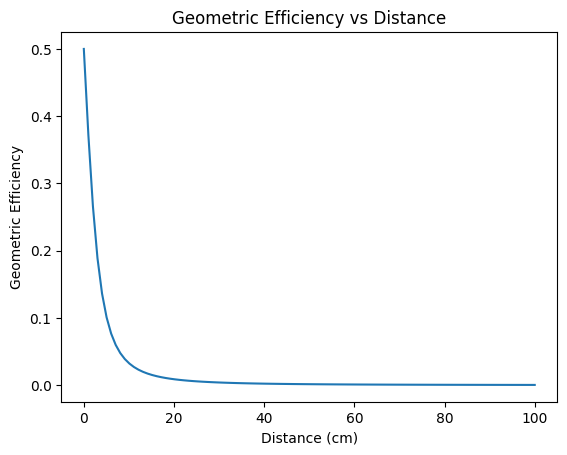

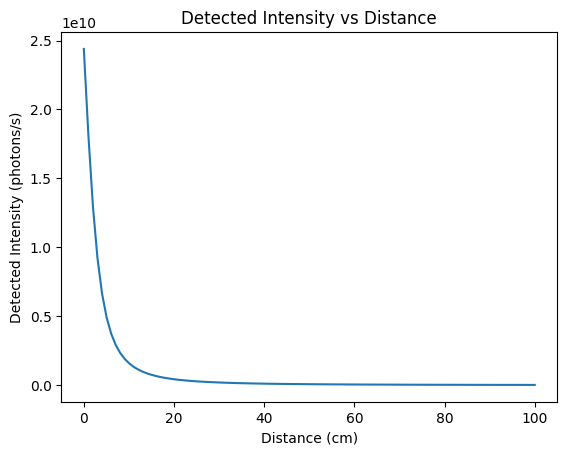

In [19]:
#Getting intial intensity using the data frame created for photon energy and emission intensity

#convert to data fram
df = pd.read_csv('7314376.csv')
df['Photon_Energy_Kev'] = df['Photon_Energy_Kev'].astype(float)
df['Emission_intensity_[%]'] = df['Emission_intensity_[%]'].astype(float)
# Activity of the source (1 Ci = 3.7e10 decays per second)
activity = 3.7e10  # 1 Ci
# Calculate the initial intensity
df['Initial_Intensity'] = activity * df['Emission_intensity_[%]'] / 100

# Total initial intensity is the sum of photons emitted per second from all energies
total_initial_intensity = df['Initial_Intensity'].sum()
print(f"Total Initial Intensity: {total_initial_intensity:.2e} photons/s")

# Detector radius in cm (3-inch diameter converted to cm)
detector_radius = 3 * 2.54 / 2

# Function to calculate geometric efficiency
def geometric_efficiency(detector_radius, distance):
    return 0.5 * (1 - (distance / np.sqrt(distance**2 + detector_radius**2)))

# Example: Calculate the detected intensity for different distances
distances = [10, 20, 50, 80, 100]

for distance in distances:
    # Calculate the geometric efficiency
    epsilon = geometric_efficiency(detector_radius, distance)
    
    # Calculate the detected intensity
    detected_intensity = total_initial_intensity * epsilon
    print(f"Distance: {distance} cm, Geometric Efficiency: {epsilon:.6f}, Detected Intensity: {detected_intensity:.2e} photons/s")

# Plot the geometric efficiency
distances = np.linspace(0, 100, 100)
geometric_efficiencies = [geometric_efficiency(detector_radius, d) for d in distances]

plt.plot(distances, geometric_efficiencies)
plt.xlabel('Distance (cm)')
plt.ylabel('Geometric Efficiency')
plt.title('Geometric Efficiency vs Distance')
plt.show()

# Plot the detected intensity
detected_intensities = [total_initial_intensity * geometric_efficiency(detector_radius, d) for d in distances]

plt.plot(distances, detected_intensities)
plt.xlabel('Distance (cm)')
plt.ylabel('Detected Intensity (photons/s)')
plt.title('Detected Intensity vs Distance')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()
